# Demonstration of aqua capabilities on Lumi

### Content

[AQUA Reader: Streamlined Data Access](#aqua)

[Regridding Functionality in the Reader](#regrid)

[Fixer...](#fixer)
    
[Vertical Interpolation in AQUA](#vertinterp)

[Time Averaging with the Reader](#timmean)

[Computing Spatial Averages Using `fldmean`](#fldmean)

[Plotting capabilities](#plot_single_map)

[Go to the end of file](#the-end)

<span class="aqua-style">AQUA</span>

<a id="aqua"></a>   
<span style="font-family: monospace; font-size: 14px;"><span style="font-family: monospace; font-size: 14px; color: red;">AQUA</span> is a model evaluation framework designed for running diagnostics on any time and spatial solution climate models. The amount of data you can analyze with <span style="font-family: monospace; font-size: 14px; color: red;">AQUA</span> is limited only by available computing resources. With its modular design, <span style="font-family: monospace; font-size: 14px; color: red;">AQUA</span> offers seamless integration of core functions, which we will show in the notebook below.</span>


<span style="font-family: monospace; font-size: 14px; ">The <span style="font-family: monospace; font-size: 14px; color: blue;">Reader</span> class in <span style="font-family: monospace; font-size: 14px; color: red;">AQUA</span> supports reading data from formats like NetCDF, GRIB, Zarr, and FDB GRIB, utilizing a pre-defined catalogue. To access new datasets, the primary challenge lies in creating a new catalog entry, a task not covered in this notebook.</span>

<span style="font-family: monospace; font-size: 14px;">If you installed <span style="font-family: monospace; font-size: 16px; color: red;">AQUA</span> correctly in your machine, you could import the <span style="font-family: monospace; font-size: 14px; color: blue;">Reader</span> class from the <span style="font-family: monospace; font-size: 16px; color: red;">AQUA</span> package as: </span>

In [ ]:
from aqua import Reader

You can access the data with Reader by specifying the model, experiment, and source names. For example, we choose the low-resolution healpix 2d hourly data from the IFS-NEMO model and from the historical 1990 experiment:

In [6]:
reader = Reader(model="IFS-NEMO", exp="historical-1990", source="hourly-hpz7-atm2d")
reader

The Reader will return an object of the class.  To return the actual dataset, we need to retrieve the data: 

In [7]:
data = reader.retrieve()
data

/pfs/lustrep3/projappl/project_465000454/nazarova/AQUA/aqua/gsv/intake_gsv.py:314: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  self._da = self._da.drop('valid_time')


<xarray.Dataset>
Dimensions:   (ncells: 196608, time: 98593)
Coordinates:
    lon       (ncells) float64 45.0 45.35 44.65 45.0 ... 315.0 315.4 314.6 315.0
    lat       (ncells) float64 0.2984 0.5968 0.5968 ... -0.5968 -0.5968 -0.2984
  * time      (time) datetime64[ns] 1990-01-01 ... 2001-04-01
Dimensions without coordinates: ncells
Data variables: (12/34)
    tclw      (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    tciw      (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    sp        (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    tcwv      (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    sd        (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    chnk      (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    ...        ...
    mtnlwrf   (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    metss     (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    mntss     (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    mer       (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    mtdwswrf  (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    tp        (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
Attributes:
    history:  2024-02-07 16:55:28 Dataset retrieved by GSV interface;\n2024-0...

The dataset contains about ten years of data and 34 climatological variables. The original dataset is about 453 TB, but it takes less than a minute to get the retrieved data. The time to get the data is so small because the function reads and returns the metadata of the specified source, not the data itself.


The output is provided as an xarray.Dataset, which preserves the original coordinates and includes all variables. Additionally, this dataset comes with attributes detailing its history, as generated by AQUA.

<a id="fldmean"></a>
If we choose some variable in the dataset, we can calculate the spatial averages using AQUA:

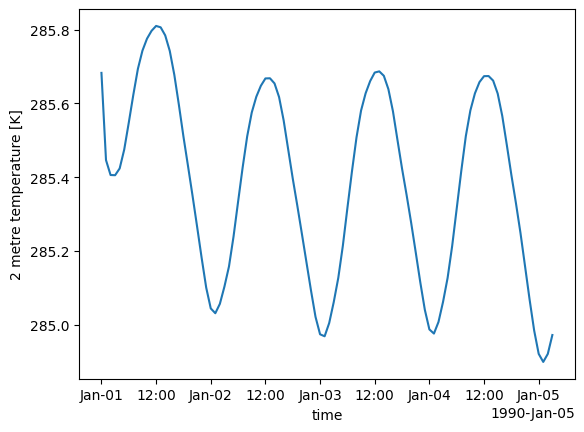

In [9]:
data['2t'].isel(time=slice(0,100)).aqua.fldmean().plot()

<a id="timmean2"></a>
In addition to spatial averages, we can calculate time-averaged data by selecting a frequency (freq), such as H (hourly), D (daily), M (monthly), or Y (yearly). We then use the timmean function to apply this operation to the data.

In [ ]:
reader.timmean(data['t'].isel(plev=0).isel(time=slice(0,100)), freq='M')

<a id="regrid"></a>
To adjust the dataset's coordinates or spatial resolution, use AQUA's regridding feature. This can be done by specifying the regrid option when initializing the Reader class.

Let's Choose a data resolution of 1 degree for both latitude and longitude, which equates to approximately 100 km at the equator.

In [11]:
reader = Reader(model="IFS-NEMO", exp="historical-1990", source="hourly-hpz7-atm2d", regrid='r100')

You can select from various resolutions: 'r005' (0.05°), 'r010' (0.1°), 'r020' (0.2°), 'r025' (0.25°), 'r050' (0.5°), 'r100' (1°), 'r200' (2°), and 'r250' (2.5°), corresponding to their respective degrees in latitude and longitude.


Let's now focus on retrieving just one variable, such as '2t', from the dataset's full variable list. Choosing specific variables streamlines the analysis, enhancing speed and memory efficiency.

In [18]:
data_2t = reader.retrieve(var='2t')

/pfs/lustrep3/projappl/project_465000454/nazarova/AQUA/aqua/gsv/intake_gsv.py:314: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  self._da = self._da.drop('valid_time')


The dataset remains an xarray.Dataset, not an xarray.DataArray. To access the variable values, use either `data.var_name` or `data['var_name']`.

Note: AQUA automatically adjusts variable names and units by default, but this feature can be turned off when initializing the Reader as:

`reader = Reader(model="IFS-NEMO", exp="historical-1990", source="hourly-hpz7-atm2d", fix=False)`

Now let's actually regrid the data with AQUA:

In [7]:
data_regrided = data['2t'].isel(time=slice(0,100)).aqua.regrid()
data_regrided

<xarray.DataArray '2t' (time: 100, lat: 90, lon: 180)>
dask.array<reshape, shape=(100, 90, 180), dtype=float64, chunksize=(12, 90, 180), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1990-01-01 1990-02-01 ... 1998-04-01
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Attributes: (12/21)
    GRIB_paramId:                    167
    long_name:                       2 metre temperature
    GRIB_stepUnits:                  1
    GRIB_gridDefinitionDescription:  150
    GRIB_typeOfLevel:                heightAboveGround
    standard_name:                   air_temperature
    ...                              ...
    GRIB_NV:                         0
    gridtype:                        healpix
    GRIB_shortName:                  2t
    GRIB_units:                      K
    GRIB_dataType:                   fc
    regridded:                       1

Note: The data would not be regrided until the user explicitly calls for the regrid function. 

<a id="plot_single_map"></a>
The AQAU package contains one main plotting function at the current state-of-the-art, which can be applied only for regrided data:

In [ ]:
data_regrided.isel(time=1).aqua.plot_single_map()

<a id="vertinterp"></a>
AQUA can be used not only with 2d data but also with 3d. 
Let's read and retrieve one of the 3d datasets listed in the catalogue:

In [21]:
reader = Reader(model="IFS-NEMO", exp="historical-1990", source="hourly-r025-atm3d", regrid="r100")
data = reader.retrieve()
data

/pfs/lustrep3/projappl/project_465000454/nazarova/AQUA/aqua/gsv/timeutil.py:169: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tsr = ts.resample(chunkfreq)
/pfs/lustrep3/projappl/project_465000454/nazarova/AQUA/aqua/gsv/timeutil.py:169: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tsr = ts.resample(chunkfreq)
/pfs/lustrep3/projappl/project_465000454/nazarova/AQUA/aqua/gsv/intake_gsv.py:314: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  self._da = self._da.drop('valid_time')


<xarray.Dataset>
Dimensions:    (lon: 1440, lat: 721, time: 98953, plev: 19)
Coordinates:
  * lon        (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat        (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1990-01-01 ... 2001-04-16
    idx_level  (plev) int64 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
Data variables:
    pv         (time, plev, lat, lon) float64 dask.array<chunksize=(6, 19, 721, 1440), meta=np.ndarray>
    z          (time, plev, lat, lon) float64 dask.array<chunksize=(6, 19, 721, 1440), meta=np.ndarray>
    t          (time, plev, lat, lon) float64 dask.array<chunksize=(6, 19, 721, 1440), meta=np.ndarray>
    u          (time, plev, lat, lon) float64 dask.array<chunksize=(6, 19, 721, 1440), meta=np.ndarray>
    v          (time, plev, lat, lon) float64 dask.array<chunksize=(6, 19, 721, 1440), meta=np.ndarray>
    q          (time, plev, lat, lon) float64 dask.array<chunksize=(6, 19, 721, 1440), meta=np.ndarray>
    w          (time, plev, lat, lon) float64 dask.array<chunksize=(6, 19, 721, 1440), meta=np.ndarray>
    r          (time, plev, lat, lon) float64 dask.array<chunksize=(6, 19, 721, 1440), meta=np.ndarray>
    clwc       (time, plev, lat, lon) float64 dask.array<chunksize=(6, 19, 721, 1440), meta=np.ndarray>
Attributes:
    history:  2024-02-07 17:58:10 Dataset retrieved by GSV interface;\n2024-0...

The dataset includes only 19 vertical levels. To obtain variable values at levels not present in the original dataset, you can perform interpolation to the desired levels as follows:

In [18]:
data['t'].isel(time=slice(0,100)).aqua.vertinterp(levels=253, vert_coord='plev', units='hPa')

/pfs/lustrep3/projappl/project_465000454/nazarova/AQUA/aqua/gsv/timeutil.py:169: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tsr = ts.resample(chunkfreq)
/pfs/lustrep3/projappl/project_465000454/nazarova/AQUA/aqua/gsv/timeutil.py:169: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tsr = ts.resample(chunkfreq)
/pfs/lustrep3/projappl/project_465000454/nazarova/AQUA/aqua/gsv/intake_gsv.py:314: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  self._da = self._da.drop('valid_time')
2024-02-07 12:07:41 :: Reader :: WARNING  -> Converting vert_coord units to interpolate from Pa to hPa
/LUMI_TYKKY_enQ4Hkr/miniconda/envs/env1/lib/python3.11/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.sp

<xarray.DataArray 't' (time: 100, lat: 721, lon: 1440)>
dask.array<chunked_aware_interpnd, shape=(100, 721, 1440), dtype=float64, chunksize=(6, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon        (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat        (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1990-01-01 ... 1990-01-05T03:00:00
    idx_level  float64 10.06
    plev       int64 253
Attributes: (12/31)
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature
    GRIB_paramId:                             130
    GRIB_shortName:                           t
    GRIB_units:                               K
    ...                                       ...
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   90.0
    GRIB_latitudeOfLastGridPointInDegrees:    -90.0
    gridtype:                                 regular_ll
    history:                                  \n2024-02-07 12:07:41 AQUA💧: In...

For an in-depth exploration of AQUA's features, refer to the example notebooks located in the [reader](https://github.com/DestinE-Climate-DT/AQUA/tree/main/notebooks/reader), [graphics](https://github.com/DestinE-Climate-DT/AQUA/tree/main/notebooks/graphics), [lra_generator](https://github.com/DestinE-Climate-DT/AQUA/tree/main/notebooks/lra_generator), [slurm](https://github.com/DestinE-Climate-DT/AQUA/tree/main/notebooks/slurm), and [gribber](https://github.com/DestinE-Climate-DT/AQUA/tree/main/notebooks/gribber) folders, or consult the [documentation](https://github.com/DestinE-Climate-DT/AQUA/tree/main/docs).

##### The end